In [7]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# load all data
raw_data = pd.read_excel('employment_data.xlsx', sheet_name='Data1', skiprows=9)

In [28]:
# copy the raw_data to something that we can work with
data = raw_data.copy()

# we only want the first 4 columns -- we're just looking at hours worked by employees
rename_map = {
    'Series ID': 'date',
    'A84630870K': 'employed_total',
    'A84630874V': 'employed_full_time',
    'A84630875W': 'employed_part_time',
    'A84630871L': 'hours_actually_worked'
}

# select only the specified columns
data = data[list(rename_map.keys())]

# rename the columns
data.rename(columns=rename_map, inplace=True)

# set date as the index
data.set_index('date', inplace=True)

# remember that the data is in thousands of people
data = data * 1000

# only show 1 decimal place  and , for legibility -- we don't convert it differently so that we have the most accurate data possible and no rounding errors
pd.set_option('display.float_format', '{:,.1f}'.format)  

In [29]:
display(data.head(2))
print(data.info())

,employed_total,employed_full_time,employed_part_time,hours_actually_worked
date,,,,
1991-02-01,"6,173,467.3","4,886,404.6","1,287,062.7","213,040,030.3"
1991-05-01,"6,153,516.2","4,793,626.9","1,359,889.3","210,606,886.0"


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 137 entries, 1991-02-01 to 2025-02-01
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   employed_total         137 non-null    float64
 1   employed_full_time     137 non-null    float64
 2   employed_part_time     137 non-null    float64
 3   hours_actually_worked  137 non-null    float64
dtypes: float64(4)
memory usage: 5.4 KB
None


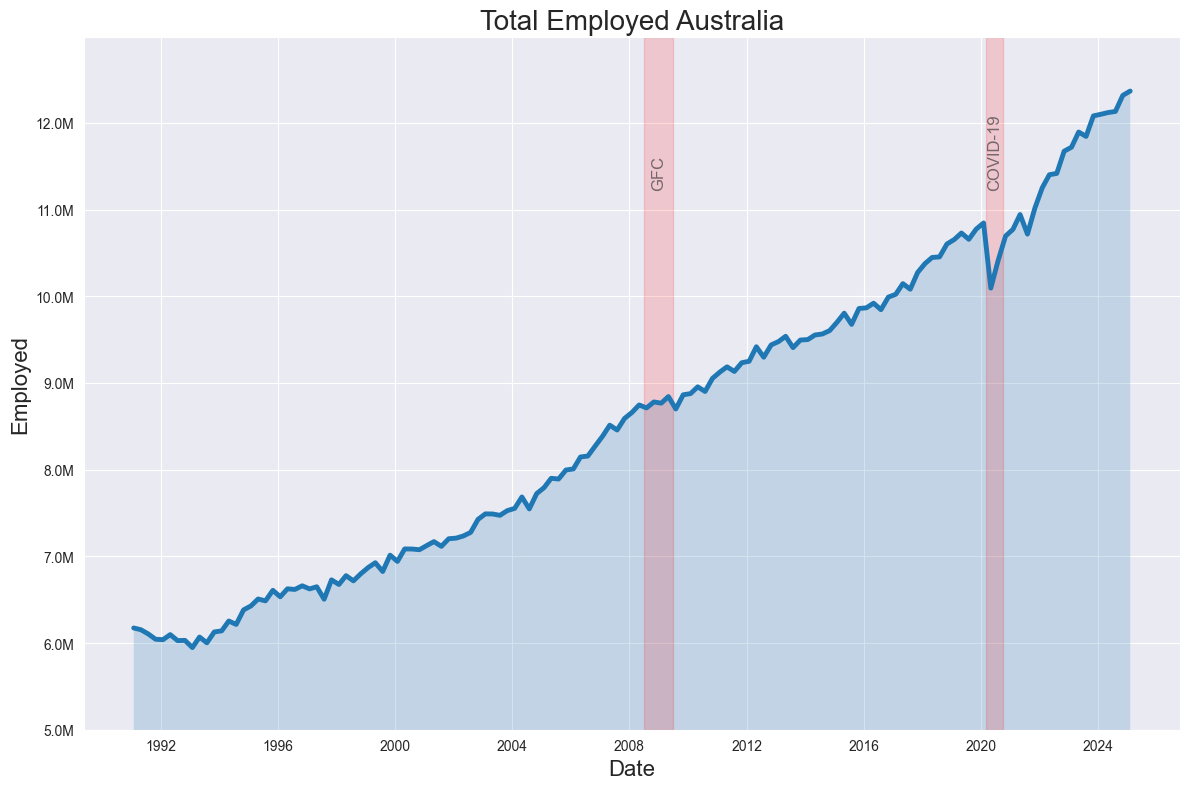

In [68]:
# data cleaned, let's visualise the data
# build the plot
from matplotlib.ticker import FuncFormatter
plt.figure(figsize=(12, 8))
sns.set_style('darkgrid')
ax = sns.lineplot(data=data, x='date', y='employed_total', linewidth=3.5, color='#1f77b4')

# add some flair
ax.fill_between(
    data.index, 
    data['employed_total'], 
    alpha=0.2,  # Transparency
    color='#1f77b4',  # Match the line color but more transparent
    linewidth=0  # No border for the filled area
)

# set minimum employment value to 5 million, 0 employment is unrealistic
min_value = 5000000  # 5 million
ax.set_ylim(bottom=min_value)

# add recession periods
recession_periods = [
    ('2008-07-01', '2009-06-30', 'GFC'),
    ('2020-03-01', '2020-09-30', 'COVID-19')
]

for start, end, label in recession_periods:
    ax.axvspan(pd.to_datetime(start), pd.to_datetime(end), 
               alpha=0.15, color='red', label=label if label not in plt.gca().get_legend_handles_labels()[1] else '')
    mid_point = pd.to_datetime(start) + (pd.to_datetime(end) - pd.to_datetime(start))/2
    y_pos = min_value + (data['employed_total'].max() - min_value) * 0.85  # Near bottom
    ax.text(mid_point, y_pos, label, ha='center', rotation=90, alpha=0.6, fontsize=12)               

# title and labels
def millions_formatter(x, pos):
    return f'{x/1000000:.1f}M'
plt.gca().yaxis.set_major_formatter(FuncFormatter(millions_formatter))
plt.title('Total Employed Australia', fontsize=20)
plt.xlabel('Date', fontsize=16)
plt.ylabel('Employed', fontsize=16)
plt.tight_layout()
plt.show()

## Analysis of Australian Employment Trends

The visualization above reveals several key patterns in Australia's employment landscape:

### Long-term Growth
- Australia has experienced consistent growth in total employment, reflecting economic expansion and population growth.
- Employment has approximately doubled over the period shown, indicating strong workforce development.

### Economic Shock Impact
- The COVID-19 pandemic caused a much sharper employment drop than the GFC but showed a V-shaped recovery.
- The GFC resulted in a gradual flattening followed by resumed growth, demonstrating different crisis response patterns.

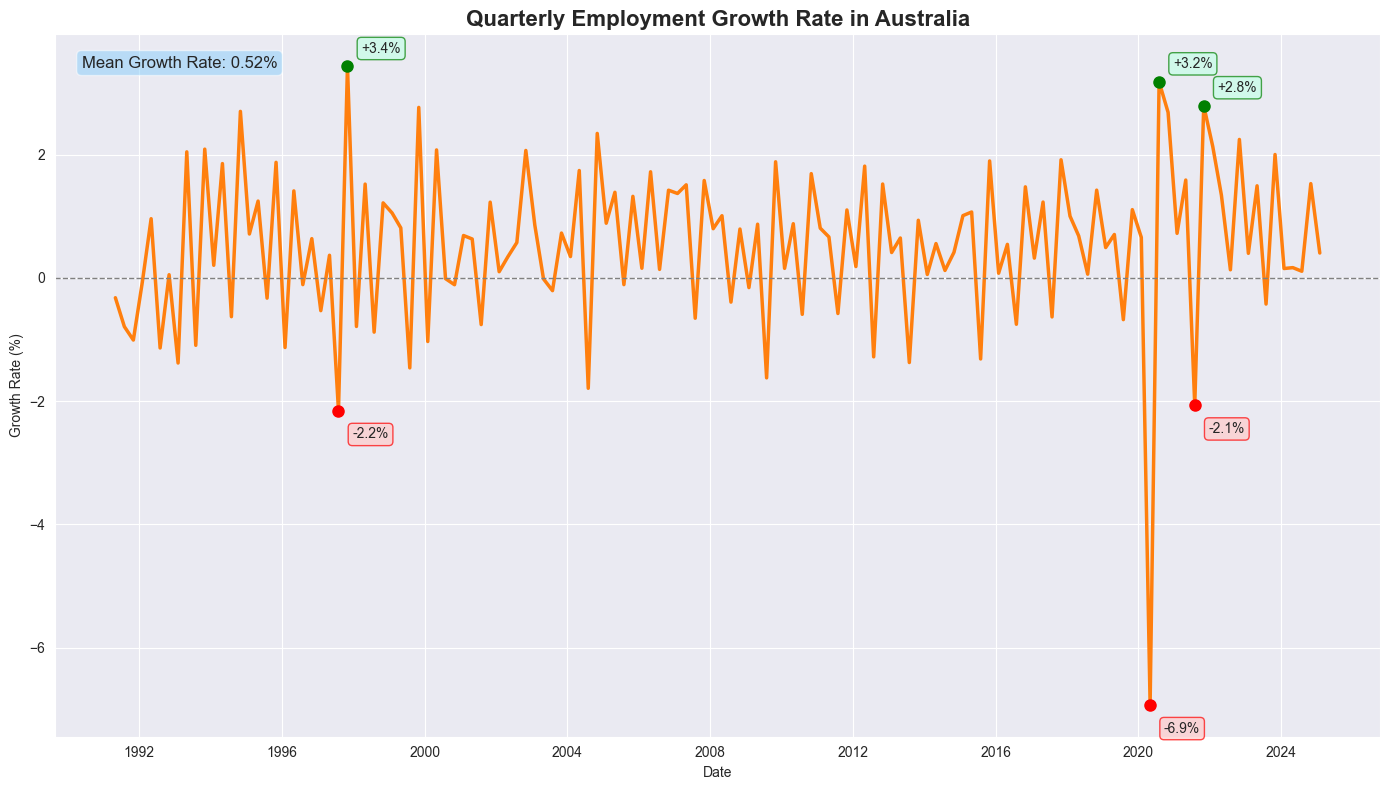

In [ ]:
# we can see the growth -- but let's look at the growth rate over time 
data['growth_rate'] = data['employed_total'].pct_change() * 100

# build the plot
fig, ax = plt.subplots(figsize=(14, 8))
ax = sns.lineplot(data=data, ax=ax, x='date', y='growth_rate', linewidth=2.5, color='#ff7f0e')

# add some flair
ax.axhline(0, color='gray', linestyle='--', linewidth=1)

mean_growth = data['growth_rate'].mean()
props = dict(boxstyle='round', facecolor='lightskyblue', alpha=0.5)
text_str = f'Mean Growth Rate: {mean_growth:.2f}%'
ax.text(0.02, 0.97, text_str, transform=ax.transAxes, fontsize=12,
        verticalalignment='top', bbox=props)

# extreme values highlighting
extreme_high = data['growth_rate'].nlargest(3)
extreme_low = data['growth_rate'].nsmallest(3)
# Highlight extreme high values
for date, value in extreme_high.items():
    ax.plot(date, value, 'o', color='green', markersize=8)
    ax.annotate(f'+{value:.1f}%', 
                xy=(date, value),
                xytext=(10, 10),
                textcoords='offset points',
                bbox=dict(boxstyle='round,pad=0.3', fc='#c6ffe8', ec='green', alpha=0.7),
                fontsize=10)
# Highlight extreme low values
for date, value in extreme_low.items():
    ax.plot(date, value, 'o', color='red', markersize=8)
    ax.annotate(f'{value:.1f}%', 
                xy=(date, value),
                xytext=(10, -20),
                textcoords='offset points',
                bbox=dict(boxstyle='round,pad=0.3', fc='#ffcccb', ec='red', alpha=0.7),
                fontsize=10)


# title and labels
ax.set_title("Quarterly Employment Growth Rate in Australia", fontsize=16, weight='bold')
ax.set_ylabel("Growth Rate (%)")
ax.set_xlabel("Date")
plt.grid(True)
plt.tight_layout()
plt.show()

## Analysis of Employment Growth Rate

The growth rate visualization reveals key patterns in Australia's labor market dynamics:

### Growth Volatility
- Employment growth shows significant quarterly volatility with a modest positive long-term trend (0.34% per quarter).
- Extreme values show how external shocks can rapidly disrupt labor markets, with COVID-19 causing an unprecedented 6.6% decline.

### Recovery Resilience  
- After major contractions, the data shows strong rebounds in employment growth, particularly evident after the COVID-19 crash.
- This resilience demonstrates Australia's labor market ability to recover from economic shocks despite short-term vulnerabilities.

## Comprehensive Analysis of Australian Employment Trends

Our analysis reveals key insights about Australia's labor market:

### Growth and Resilience
- Despite periodic disruptions, Australia maintained positive employment growth averaging 0.34% quarterly.
- The labor market demonstrated remarkable resilience following shocks, particularly with the rapid V-shaped recovery after COVID-19.

### Structural Changes
- Employment composition shows a gradual shift toward more part-time work, reflecting broader economic changes.
- This transformation suggests the need for policy adaptation regarding benefits, retirement savings, and income security in an evolving work landscape.